<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_3_OLCI_coverage.ipynb"><< Determining OLCI product coverage</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_5_OLCI_radiance_reflectance_spectra.ipynb">OLCI radiance and reflectance spectra >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-olci"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-olci/HEAD?labpath=1_OLCI_introductory%2F1_4_OLCI_bands_imagery.ipynb"><img src="https://mybinder.org/badge_logo.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-olci/1_OLCI_introductory/1_4_OLCI_bands_imagery.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://code.insula.destine.eu/hub/"><img src="https://img.shields.io/badge/launch-DestinE-f43fd3.svg"></a></div></div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OLCI: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1a_OLCI_data_access_Data_Store.ipynb" target="_blank">1_1a_OLCI_data_access_Data_Store.ipynb</a>** if using the Data Store for data access
    <br><br>**OR**<br><br>
  - **<a href="./1_1b_OLCI_data_access_HDA.ipynb" target="_blank">1_1b_OLCI_data_access_HDA.ipynb</a>** if using WEkEO for data access
    
</div>
<hr>

# 1.4 OLCI bands and imagery

### Data used

| Dataset | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level 1b full resolution | EO:EUM:DAT:0409 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_1_EFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_1_EFR___" target="_blank">Description</a> |
| Sentinel-3 OLCI level 1b full resolution (version BC004) reoprocessing| EO:EUM:DAT:0885 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0885" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_1_EFR___" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know;
* How the OLCI instrument collects data at different wavelengths to characterise the colour of the light reflected by the ocean, land, and atmosphere.
* How to extract the data associated with these wavebands from the OLCI level-1 product.
* How to combine the data from these different wavebands to create a true colour/"Red Green Blue (RGB)" image.
* How to select band combinations and optimise the scaling to highlight specific features in the images.


### Outline

Whilst we may typically see images from satellites presented, these images are often actually generated from measurements made at a variety of wavelengths in the visible (and beyond) parts of the electromagnetic spectrum. Ocean colour sensors are designed to measure light reflected from the ocean surface at specific wavelengths, to provide information on the composition of ocean waters. 

In this notebook, we'll look at the different wavebands that the Ocean and Land Colour Instruments aboard Sentinel-3 measures in. We'll see how this data can be used to make images that are readily interpretable by the human eye to get a general idea of what ocean colour data can tell us.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [OLCI bands](#section1)
 1. [Common RGB band recipes](#section2)
 1. [Improving RGBs](#section3)
 1. [Mapping RGBs](#section4)
 1. [Applying your knowledge](#section5)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports
import cartopy.crs as ccrs          # a library that support mapping
import glob                         # a library that aids in searching for files
import matplotlib.pyplot as plt     # a library that support plotting
import matplotlib.ticker as mticker # a library that extends plotting support
import numpy as np                  # a library that provides support for array-based mathematics
import os                           # a library that allows us access to basic operating system commands
import warnings                     # a library that helps us manage warnings
import xarray as xr                 # a library that supports the use of multi-dimensional arrays in Python
import eumartools                   # a EUMETSAT library that support working with Sentinel-3 products
warnings.filterwarnings('ignore')

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. OLCI bands
[Back to top](#TOC_TOP)

</div>

# Diagram of OLCI bands vs spectrum

OLCI has 21 narrow spectral bands that detect at various wavelengths between 400 nm and 1020 nm. A subset of these wavelengths is shown in the image below. All bands provide data at the same 300m spatial resolution.

<img src='../img/OLCI_spectral_1200.png' align='centre' width='75%'></img>
<center>Figure 1: The spectral resolution of Sentinel-3 OLCI.</center>
<br>

Let's look at some data from the different wavebands in a level-1B OLCI product...

In [2]:
# selecting SAFE directory
SAFE_directory = glob.glob(os.path.join(os.getcwd(), 'products', 'S3A_OL_1_EFR____20210717T101015_20210717T101315_*'))[0]

In the next block of code, we'll set some parameters that we'll then use when reading in the data from the different wavebands.

First we'll reduce the scale of the data - we are plotting a full scene, so we don't really need the highest resolution available At this scale, the difference in resolution will be negligible once plotted, but make our plotting much faster. If you were looking at a smaller region/conducting a quantitative analysis, you would not use this approach. 

Then we'll use the glob command to find all the bands - we can identify all the band files because they have the "Oa" prefix. We don't need to open all the bands, as some are used for atmospheric correction and won't provide us with more information about the colour of the surfaces we are interested in, so we will skip opening these.

In [3]:
grid_reduce = 3
band_vars = xr.open_mfdataset(glob.glob(os.path.join(SAFE_directory,'Oa*.nc')))
band_dict = {}
bands_needed = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 17]

for band_var in band_vars:
    band_num = int(band_var.split('_')[0][2:])
    if band_num not in bands_needed:
        print(f"Skipping: {band_var}, as we don't need it for now")
    else:
        print(f"Reading:  {band_var}")
        band_dict[band_var] = band_vars[band_var].data[::grid_reduce,::grid_reduce]

band_vars.close()

Reading:  Oa01_radiance
Reading:  Oa01_radiance_unc
Reading:  Oa02_radiance
Reading:  Oa02_radiance_unc
Reading:  Oa03_radiance
Reading:  Oa03_radiance_unc
Reading:  Oa04_radiance
Reading:  Oa04_radiance_unc
Reading:  Oa05_radiance
Reading:  Oa05_radiance_unc
Reading:  Oa06_radiance
Reading:  Oa06_radiance_unc
Reading:  Oa07_radiance
Reading:  Oa07_radiance_unc
Reading:  Oa08_radiance
Reading:  Oa08_radiance_unc
Reading:  Oa09_radiance
Reading:  Oa09_radiance_unc
Reading:  Oa10_radiance
Reading:  Oa10_radiance_unc
Reading:  Oa11_radiance
Reading:  Oa11_radiance_unc
Skipping: Oa12_radiance, as we don't need it for now
Skipping: Oa12_radiance_unc, as we don't need it for now
Skipping: Oa13_radiance, as we don't need it for now
Skipping: Oa13_radiance_unc, as we don't need it for now
Skipping: Oa14_radiance, as we don't need it for now
Skipping: Oa14_radiance_unc, as we don't need it for now
Skipping: Oa15_radiance, as we don't need it for now
Skipping: Oa15_radiance_unc, as we don't need

<div class="alert alert-info" role="alert">

## <a id='section1'></a>2. Common RGB band recipes
[Back to top](#TOC_TOP)

</div>

Our eyes contain three types of cones (short, medium and long-wave) that detect light in relatively broad bands centred on 437 nm, 533 nm and 564 nm. These wavelengths approximately map to the wavelengths of blue (\~450 nm), green (\~550 nm) and red light (\~650 nm).

We create an RGB image by mapping any of these wavelengths to the "red", "green" and "blue" channels that our eyes detect. It is important to remember, though, that "RGB" refers to the channels in the image we produce, and <font color="#FF0000">**not necessarily**</font> the bands we use to create the channels.

When we map the appropriate bands for the wavelengths of red (\~650 nm), green (\~550 nm) and blue (\~450 nm) light to the RGB channels, then we call this a *true colour* or *natural colour* image. When we use other band combinations, we call this a *false colour* image. Sometimes, to highlight specific features, we drift between the two or overlay. However, our eyes do not detect intensity linearly, so there are a few tricks we can use to improve our images.

Band recipes for RGB images are very varied, but here are some common ones

* <font color="#138D75">**natural colour single band**</font> - this uses the nearest bands to red, green and blue light; for OLCI these are bands 8, 6 & 2)
* <font color="#138D75">**tristimulus**</font> - this applies the spectral response function of our eyes to OLCI, utilising 10 bands
* <font color="#138D75">**natural colour broad band, log scaled**</font> - this takes a broader selection of bands for each channel and log scales the intensity to our visual system
* <font color="#138D75">**false colour**</font> - this maps any selection of bands you like to RGB, and is useful for feature extraction, e.g. 17, 6, 2 for near-infrared sensitivity in the "red" channel

Below, we will build these four band recipes and compare how they look for our test scene. Note that, in each case, we normalise our image array using the `eumartools.normalise_image` method. This will re-scale the image range to values between 0 and 1, which our plotting routine requires. For more information on the method, you can run ```print(inspect.getsource(eumartools.normalise_image))```

In [4]:
# Natural colour single band
red_recipe = band_dict['Oa08_radiance']
green_recipe = band_dict['Oa06_radiance']
blue_recipe = band_dict['Oa02_radiance']

rgb_nat = np.dstack((red_recipe, green_recipe, blue_recipe))
rgb_nat_norm = eumartools.normalise_image(rgb_nat)

In [5]:
# Tristimulus
red_recipe = np.log10(1.0 + 0.01 * band_dict['Oa01_radiance'] + 0.09 * band_dict['Oa02_radiance'] 
                      + 0.35 * band_dict['Oa03_radiance'] + 0.04 * band_dict['Oa04_radiance'] 
                      + 0.01 * band_dict['Oa05_radiance'] + 0.59 * band_dict['Oa06_radiance'] 
                      + 0.85 * band_dict['Oa07_radiance'] + 0.12 * band_dict['Oa08_radiance'] 
                      + 0.07 * band_dict['Oa09_radiance'] + 0.04 * band_dict['Oa10_radiance'])
green_recipe = np.log10(1.0 + 0.26 * band_dict['Oa03_radiance'] + 0.21 * band_dict['Oa04_radiance'] 
                        + 0.50 * band_dict['Oa05_radiance'] + band_dict['Oa06_radiance'] 
                        + 0.38 * band_dict['Oa07_radiance'] + 0.04 * band_dict['Oa08_radiance'] 
                        + 0.03 * band_dict['Oa09_radiance'] + 0.02 * band_dict['Oa10_radiance'])
blue_recipe = np.log10(1.0 + 0.07 * band_dict['Oa01_radiance'] + 0.28 * band_dict['Oa02_radiance'] 
                       + 1.77 * band_dict['Oa03_radiance'] + 0.47 * band_dict['Oa04_radiance'] 
                       + 0.16 * band_dict['Oa05_radiance'])

rgb_tri = np.dstack((red_recipe, green_recipe, blue_recipe))
rgb_tri_norm = eumartools.normalise_image(rgb_tri)

In [6]:
# Natural colour broad band, log scaled
red_recipe = 0.16666 * band_dict['Oa08_radiance'] + 0.66666 * band_dict['Oa09_radiance'] \
             + 0.08333 * band_dict['Oa10_radiance'] + 0.08333 * band_dict['Oa11_radiance']
green_recipe = 0.16666 *  band_dict['Oa05_radiance'] + 0.66666 *  band_dict['Oa06_radiance'] \
               + 0.16666 *  band_dict['Oa07_radiance']
blue_recipe = 0.16666 *  band_dict['Oa02_radiance'] + 0.66666 *  band_dict['Oa03_radiance'] \
               + 0.16666 *  band_dict['Oa04_radiance']

rgb_log = np.dstack(((np.log10(red_recipe * 0.01) + 1.6516951369518393) / 1.9887713527138795,
                    (np.log10(green_recipe * 0.01) + 1.6516951369518393) / 1.9887713527138795,
                    (np.log10(blue_recipe * 0.01) + 1.6516951369518393) / 1.9887713527138795))
                     
rgb_log_norm = eumartools.normalise_image(rgb_log)

In [7]:
# False colour
red_recipe = band_dict['Oa17_radiance']
green_recipe = band_dict['Oa06_radiance']
blue_recipe = band_dict['Oa02_radiance']

rgb_fls = np.dstack((red_recipe, green_recipe, blue_recipe))
rgb_fls_norm = eumartools.normalise_image(rgb_fls)

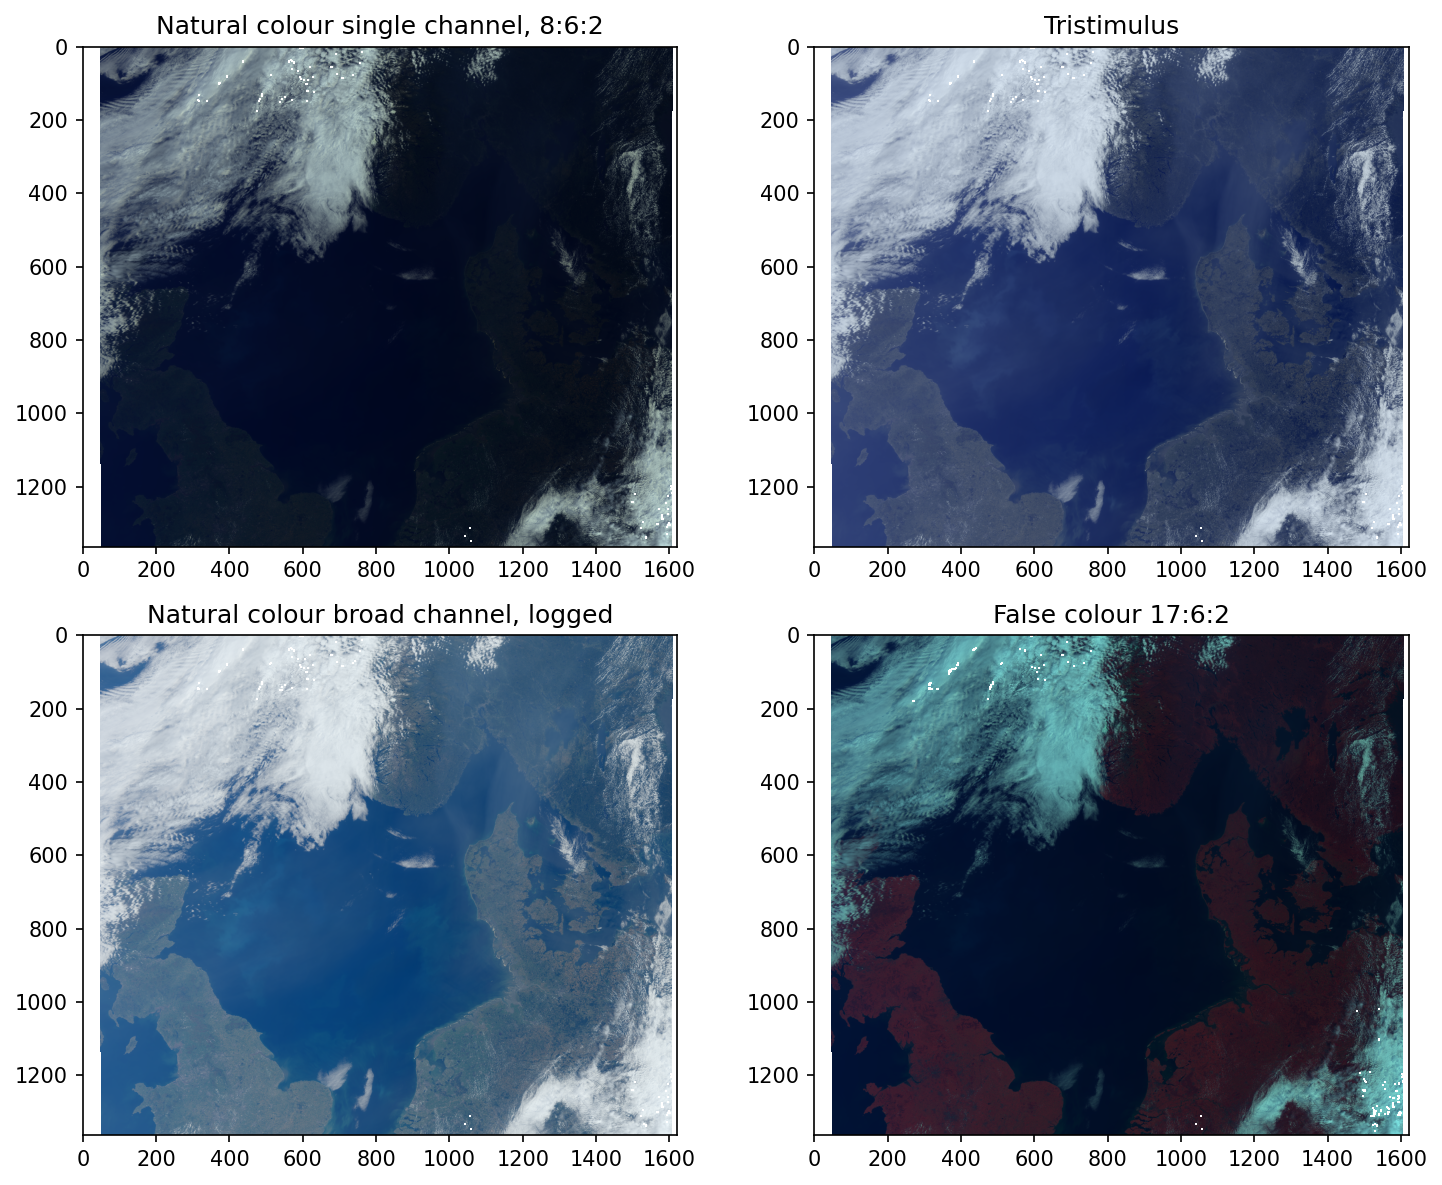

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

axs[0,0].imshow(rgb_nat_norm); axs[0,0].title.set_text('Natural colour single channel, 8:6:2')
axs[0,1].imshow(rgb_tri_norm); axs[0,1].title.set_text('Tristimulus')
axs[1,0].imshow(rgb_log_norm); axs[1,0].title.set_text('Natural colour broad channel, logged')
axs[1,1].imshow(rgb_fls_norm); axs[1,1].title.set_text('False colour 17:6:2')

plt.tight_layout()

Above we can see that there are a lot of differences in images created from OLCI data depending on which band combinations you choose. You can see that there's some advantages and disadvantages to the different choices. Both Tristimulus and Natural colour broad band give an approximate visualisation of what you might expect the Earth to look like if you were in space looking down with your own eyes. The False colour 17:6:2 image very distinctly shows the differences between water, land, and clouds, but isn't particularly helpful for identifying different features on land or in the oceans. 

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Improving RGBs
[Back to top](#TOC_TOP)

</div>

There are a number of ways that we can improve our RGB images. For instance we can:
* `normalise` our image by channel ("unhitch"-ing them), as opposed to above where we normalised by all channels.
* `histogram` our image, rebinning it in "n" bins to reduce the dynamic range, normalisation required first!
* `truncate` our image, cutting out some of the outliers based on percentiles

Lets try some of these examples below, using `rgb_log` (or `rgb_log_norm`) or as the basis.

In [9]:
rgb_log_norm_unhitch = eumartools.normalise_image(rgb_log, unhitch=True)
rgb_log_norm_trunc = eumartools.truncate_image(rgb_log_norm, min_percentile=5.0, max_percentile=95.0)
rgb_log_norm_hist = eumartools.histogram_image(rgb_log_norm, nbins=512)

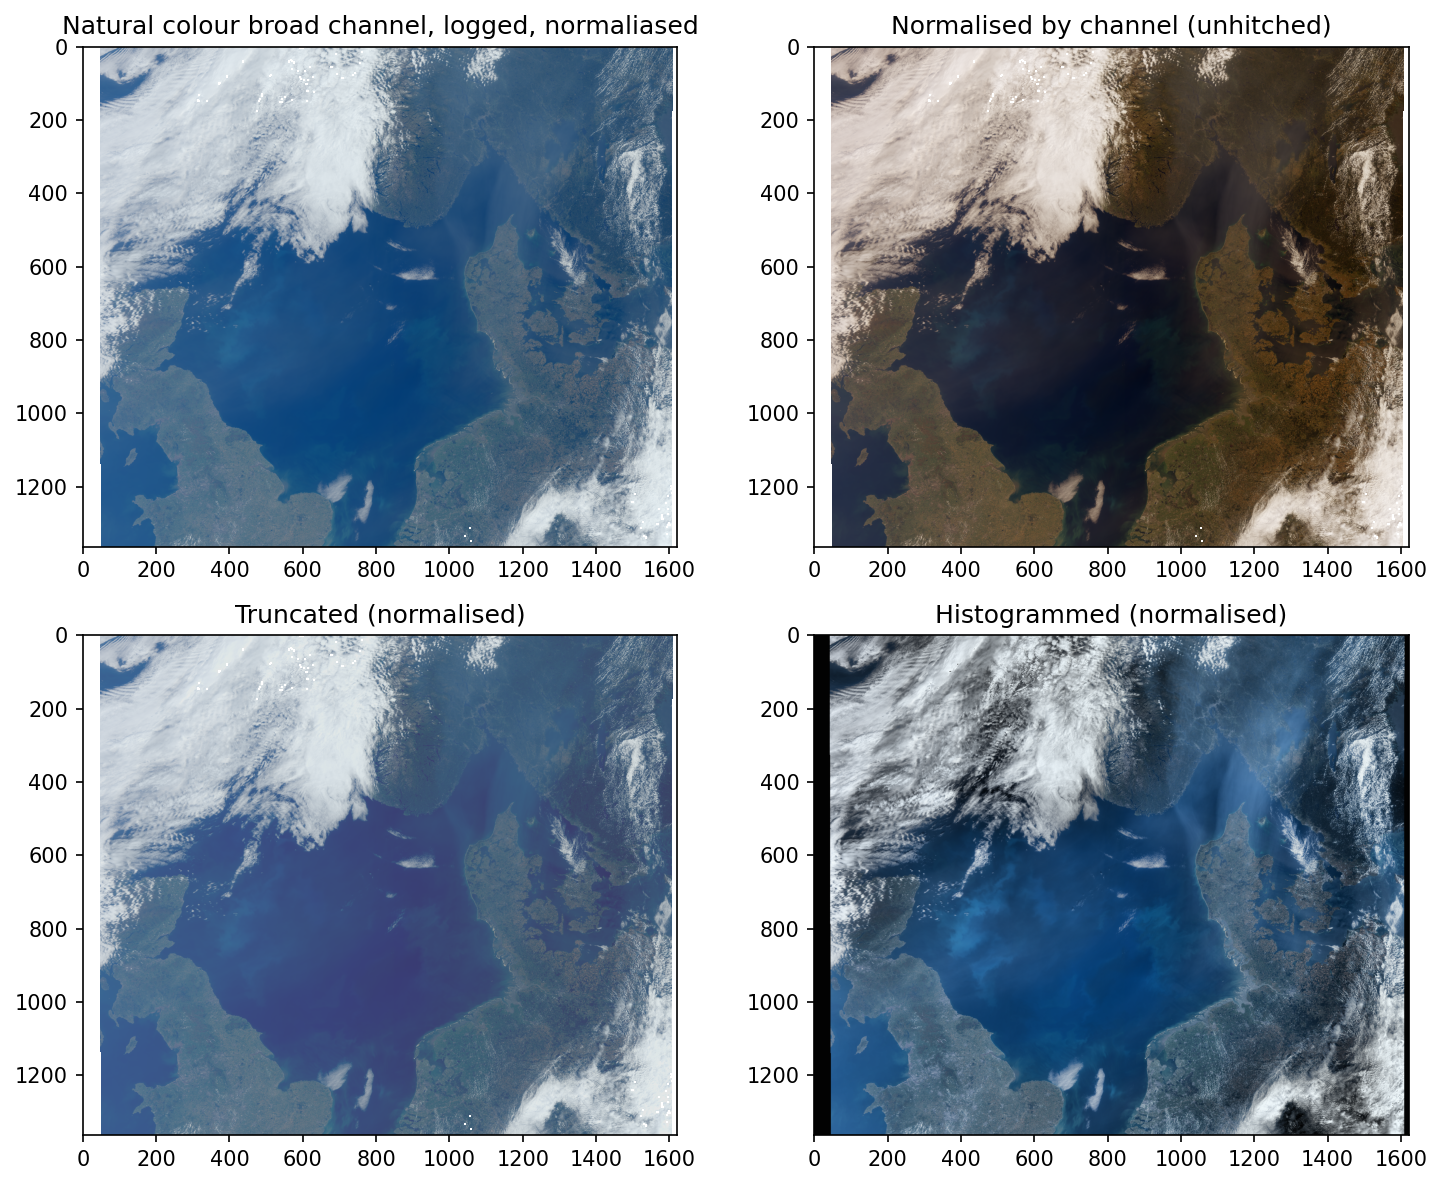

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

axs[0,0].imshow(rgb_log_norm); axs[0,0].title.set_text('Natural colour broad channel, logged, normaliased')
axs[0,1].imshow(rgb_log_norm_unhitch); axs[0,1].title.set_text('Normalised by channel (unhitched)')
axs[1,0].imshow(rgb_log_norm_trunc); axs[1,0].title.set_text('Truncated (normalised)')
axs[1,1].imshow(rgb_log_norm_hist); axs[1,1].title.set_text('Histogrammed (normalised)')

plt.tight_layout()

As in the previous examples, we can see differences between the approaches used above. The different choices made allow us to highlight different features, and in the final one we can see that we are able to identify a range of different features in the ocean.

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Mapping RGBs
[Back to top](#TOC_TOP)

</div>

So far we have only shown images displayed against pixel coordinates (rows & columns). If we want to display this on geographical coordinates we need to use our longitude and latitude variables. The OLCI level-1b and level-2 grids are "curvilinear", so our longitude and latitude coordinates are both 2-dimensional arrays. The most convenient way to plot this in python is to use the matplotlib `pcolormesh` routine, and to map each pixel to an RGB colour.

In [11]:
geo_file = os.path.join(SAFE_directory,'geo_coordinates.nc')
geo_vars = xr.open_dataset(geo_file)
lon = geo_vars.longitude.data[::grid_reduce,::grid_reduce]
lat = geo_vars.latitude.data[::grid_reduce,::grid_reduce]
geo_vars.close()

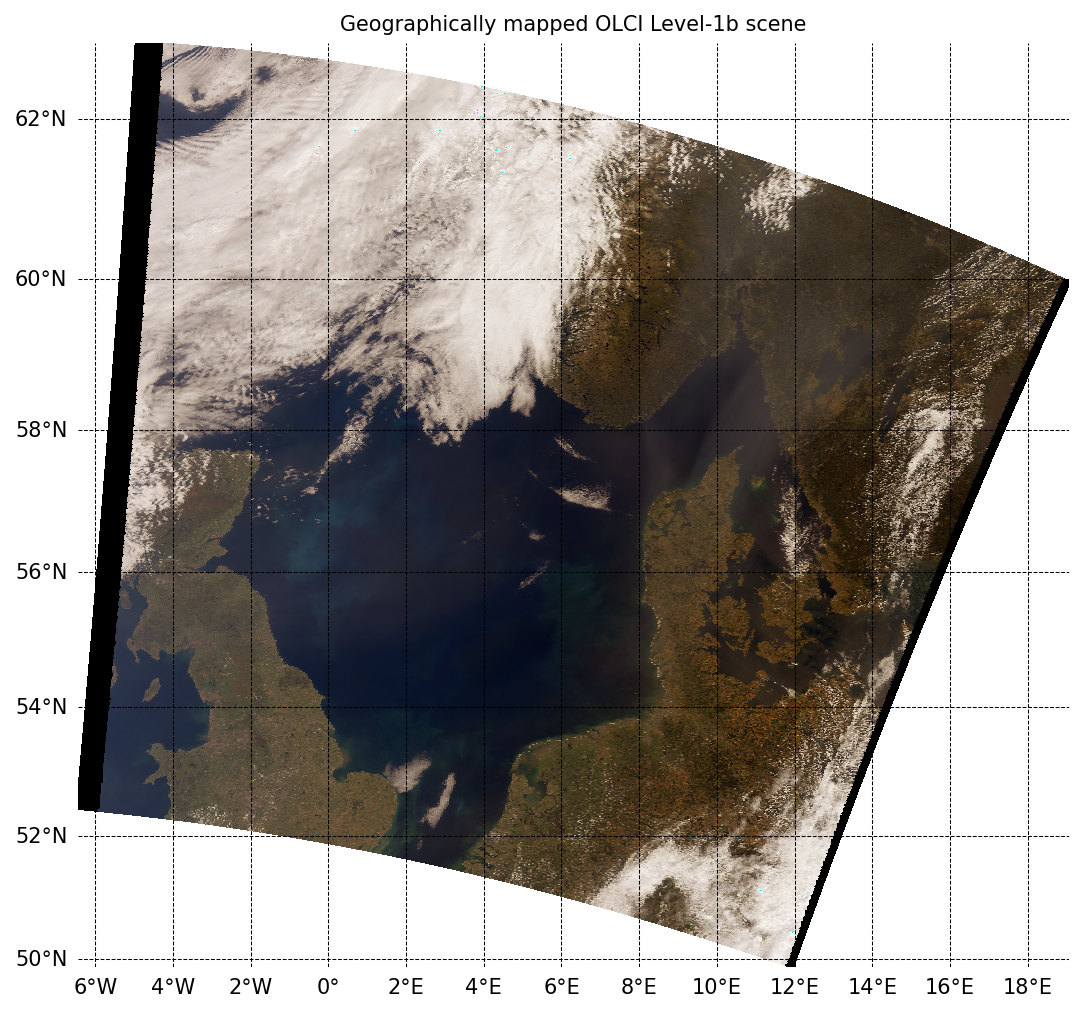

In [12]:
fig = plt.figure(figsize=(10, 8), dpi=150)
m = plt.subplot(projection=ccrs.Mercator())

# make the colour map
colorArray = np.array(rgb_log_norm_unhitch)
colorTuple = colorArray.reshape((colorArray.shape[0] * colorArray.shape[1]), 3)
colorTuple = np.insert(colorTuple, 3, 1.0, axis=1)

# make the map
m.pcolormesh(lon, lat, lon, color=colorTuple, edgecolors=None, transform=ccrs.PlateCarree())

# Embellish with gridlines
g1 = m.gridlines(draw_labels = True, zorder=20, color='k', linestyle='--',linewidth=0.5)
g1.xlocator = mticker.FixedLocator(np.arange(-180, 180, 2))
g1.ylocator = mticker.FixedLocator(np.arange(-90, 90, 2))
g1.top_labels = False
g1.right_labels = False
g1.xlabel_style = {'size': 10, 'color': 'black'}
g1.ylabel_style = {'size': 10, 'color': 'black'}
m.set(facecolor = "1.0")
m.axis('off')

plt.title('Geographically mapped OLCI Level-1b scene', fontsize=10)
plt.savefig('1_4_OLCI_RGB.png', bbox_inches='tight')
plt.show()

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Applying your knowledge
[Back to top](#TOC_TOP)

</div>

Try using the routines provided to create a geographically mapped scene, that highlights the phytoplankton signals.

<div class="alert alert-block alert-success">

#### Solution
*click arrow on left to reveal*

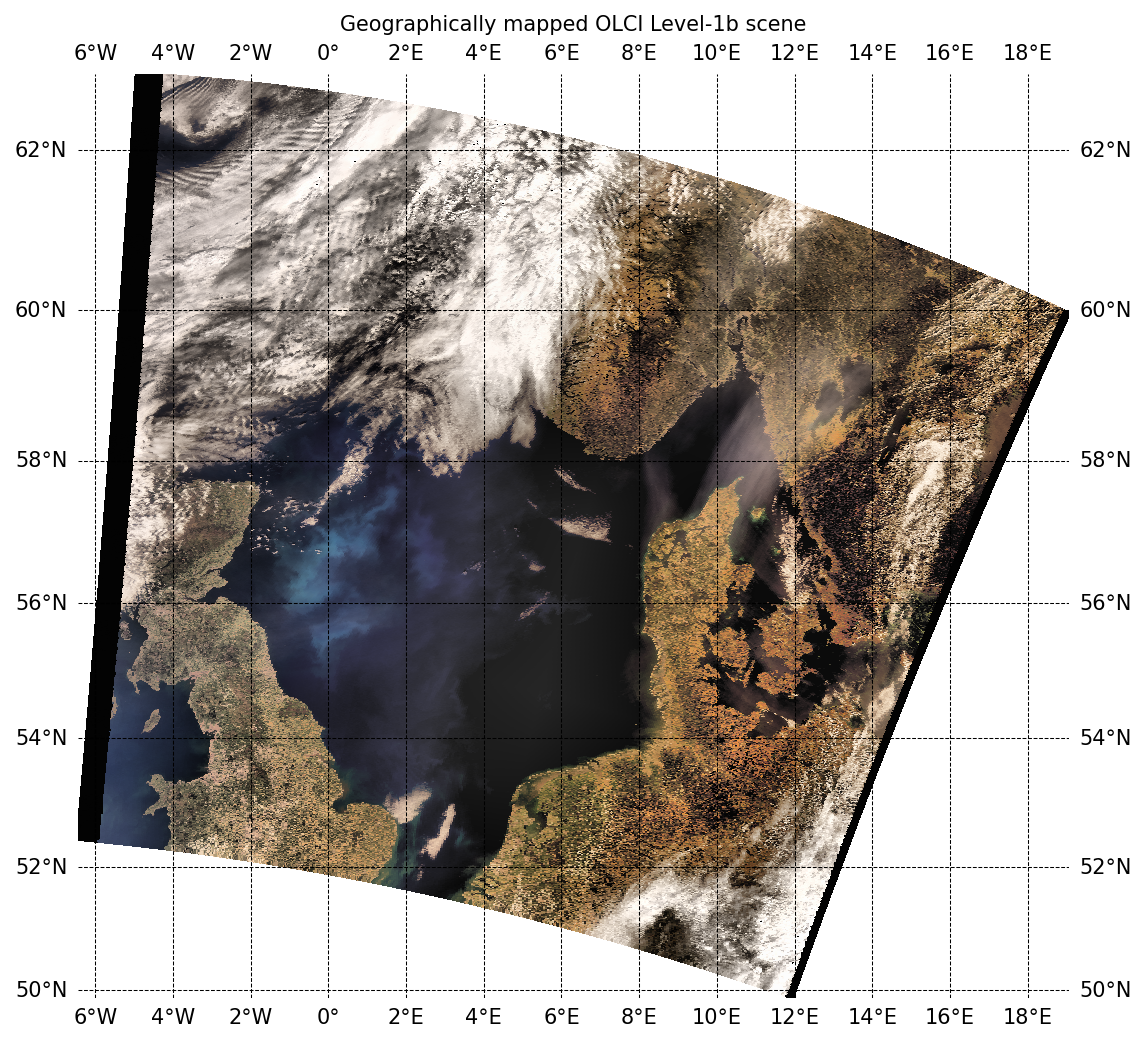

In [13]:
# first normalise by channel
rgb_log_norm_unhitch = eumartools.normalise_image(rgb_log, unhitch=True)
# then remove the outliers from the unhitched image
rgb_log_norm_unhitch_trunc = eumartools.truncate_image(rgb_log_norm_unhitch)
# then histogram the truncate image
rgb_log_final = eumartools.histogram_image(rgb_log_norm_unhitch_trunc, nbins=512)

# make the plot
fig = plt.figure(figsize=(10, 8), dpi=150)
m = plt.subplot(projection=ccrs.Mercator())

# make the colour map
colorArray = np.array(rgb_log_final)
colorTuple = colorArray.reshape((colorArray.shape[0] * colorArray.shape[1]), 3)
colorTuple = np.insert(colorTuple, 3, 1.0, axis=1)

# make the map
m.pcolormesh(lon, lat, lon, color=colorTuple, edgecolors=None, transform=ccrs.PlateCarree())

# Embellish with gridlines
g1 = m.gridlines(draw_labels = True, zorder=20, color='k', linestyle='--',linewidth=0.5)
g1.xlocator = mticker.FixedLocator(np.arange(-180, 180, 2))
g1.ylocator = mticker.FixedLocator(np.arange(-90, 90, 2))
g1.xlabels_top = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 10, 'color': 'black'}
g1.ylabel_style = {'size': 10, 'color': 'black'}
m.set(facecolor = "1.0")
m.axis('off')

plt.title('Geographically mapped OLCI Level-1b scene', fontsize=10)
plt.show()

<hr>

### What to try next?

* Try choose your own OLCI level 1b product and create your own RGB image.
* Try adapting this script to read an OLCI level 2 and create your own RGB image <font color="#138D75">**(hint: "reflectance" replaces "radiance" at level-2)**</font>.

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_3_OLCI_coverage.ipynb"><< Determining OLCI product coverage</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_5_OLCI_radiance_reflectance_spectra.ipynb">OLCI radiance and reflectance spectra >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean/">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>